# Testing Singular Value Thresholding Algorithm

In this notebook, we implement and test the Singular Value Thresholding Algorithm (SVT).

In [30]:
import numpy as np 
from scipy import sparse as sparse
from scipy.sparse import linalg as slinalg

def SVT(X, tau):
    """Perform Singular Value Thresholding

    Args:
        X (np.array): the matrix to be thresholded
        tau (number): the parameter associated with the nuclear norm

    Returns:
        number: SVTed matrix
    """
    svd_k = 6
    # Convert to sparse matrix Xs, s stands for sparse
    Xs = sparse.csc_matrix(X)
    # SVD decomposition
    u, s, vh = slinalg.svds(Xs, k=svd_k)
    # Shrink the singular values by tau:
    s_new = sparse.diags(np.maximum(0,s-tau))
    return u @ s_new @ vh

In [19]:
def eval(X: np.array, Y: np.array):
    """Calculate the expression 1/2||X-Y||_F^2 + tau ||X||*
    
    Args:
        X (np.array): the thresholded matrix
        Y (np.array): the original matrix

    Returns:
        number: the objective function 1/2||X-Y||_F^2 + tau ||X||*
    """

    fr_term = 0.5 * np.linalg.norm(X-Y, ord="fro") # Frobenius norm
    u, s, vh = np.linalg.svd(X)
    nn_term = np.sum(s)

    return fr_term+nn_term


Now let's test with a sample uniformly random matrix:

In [20]:
np.random.seed(6969)
M = np.random.rand(10,10)

In [21]:
M_star = SVT(M, 0.15)

In [23]:
from matplotlib import pyplot as plt

Best M:  10.584342488327456
Minimum of J:  11.877280441399266


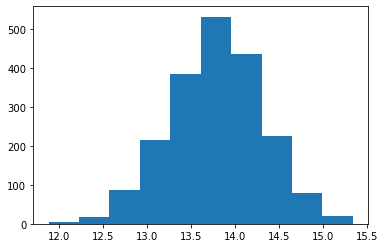

In [29]:
J_star = eval(M_star, M)
print('Best M: ', J_star)
J = []
for i in range(2000):
    N = np.random.rand(10,10)
    J.append(eval(N, M))

plt.hist(np.array(J))
print('Minimum of J: ', np.min(J))


So it does indeed look like the SVT function could minimize the cost function.